In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import shap
import sklearn
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("../src/helper-functions"))
import tree_shap

In [2]:
Tree = DecisionTreeRegressor()

In [3]:
target = [-10] * 10 + [10] * 5 + [5] * 20 + [14] * 5
cat_1 = [1] * 10 + [0] * 30
x = [60] * 5 + [45] * 30 +  [50] * 5
cat_2 = [1] * 15 + [0] * 25
data = pd.DataFrame({"cat_1": cat_1,
                     "cat_2": cat_2,
                     "x": x,
                     "target": target})

In [4]:
Tree.fit(data.values[:,:-1], data.values[:,-1])
explainer_tree = shap.TreeExplainer(Tree)
input_shap = np.array([0,1,60])
print(f"Shap values from the fitted explainer: {explainer_tree.shap_values(input_shap)}")
print(f"Theoretical Shap values: {np.array([191/36, 25/18, 155/36])}")
input_shap = np.array([[0,1,60], [1,0,40]])

Shap values from the fitted explainer: [5.30555556 1.38888889 4.30555556]
Theoretical Shap values: [5.30555556 1.38888889 4.30555556]


In [15]:
Tree.tree_.n_node_samples


array([40, 30, 25, 20,  5,  5, 10], dtype=int64)

In [5]:
explainer_tree_shap = shap.TreeExplainer(Tree)
explainer_tree_shap.shap_values(input_shap)

array([[  5.30555556,   1.38888889,   4.30555556],
       [-12.14583333,  -0.33333333,  -0.52083333]])

In [6]:
explainer_tree_cat = tree_shap.tree_cat_explainer(Tree)
explainer_tree_cat.shap_values(input_shap)

array([[  5.30555556,   1.38888889,   4.30555556],
       [-12.14583333,  -0.33333333,  -0.52083333]])

In [7]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=20,
                           n_informative=10, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier()
clf.fit(X, y)
input_rf = X[39]


In [8]:
explainer_rf_shap = shap.TreeExplainer(clf)
explainer_rf_shap.shap_values(input_rf)

array([[ 0.31882277, -0.31882277],
       [ 0.00452016, -0.00452016],
       [ 0.02143294, -0.02143294],
       [ 0.01743621, -0.01743621],
       [-0.04689645,  0.04689645],
       [ 0.02711024, -0.02711024],
       [ 0.01853058, -0.01853058],
       [ 0.03271735, -0.03271735],
       [ 0.02788661, -0.02788661],
       [ 0.0329632 , -0.0329632 ],
       [ 0.00214853, -0.00214853],
       [ 0.00503364, -0.00503364],
       [ 0.00225892, -0.00225892],
       [ 0.00264578, -0.00264578],
       [ 0.00127321, -0.00127321],
       [-0.00088399,  0.00088399],
       [-0.00330166,  0.00330166],
       [ 0.00144389, -0.00144389],
       [ 0.00521791, -0.00521791],
       [-0.00192384,  0.00192384]])

In [9]:
explainer_rf_cat = tree_shap.tree_cat_explainer(clf)
explainer_rf_cat.shap_values(input_rf)

array([[ 0.31882277, -0.31882277],
       [ 0.00452016, -0.00452016],
       [ 0.02143294, -0.02143294],
       [ 0.01743621, -0.01743621],
       [-0.04689645,  0.04689645],
       [ 0.02711024, -0.02711024],
       [ 0.01853058, -0.01853058],
       [ 0.03271735, -0.03271735],
       [ 0.02788661, -0.02788661],
       [ 0.0329632 , -0.0329632 ],
       [ 0.00214853, -0.00214853],
       [ 0.00503364, -0.00503364],
       [ 0.00225892, -0.00225892],
       [ 0.00264578, -0.00264578],
       [ 0.00127321, -0.00127321],
       [-0.00088399,  0.00088399],
       [-0.00330166,  0.00330166],
       [ 0.00144389, -0.00144389],
       [ 0.00521791, -0.00521791],
       [-0.00192384,  0.00192384]])

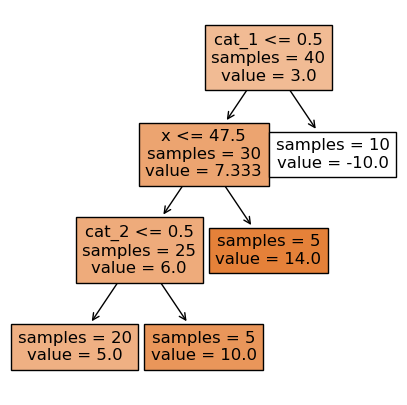

In [10]:
fig, ax = plt.subplots(figsize = (5,5))
plot_tree(Tree, ax = ax, filled=True, feature_names = ["cat_1", "cat_2", "x"], impurity = False)
plt.show()

In [11]:
Tree_classif = DecisionTreeClassifier()
Tree_classif.fit(X, y)

DecisionTreeClassifier()

In [12]:
explainer_tree_classif_cat = tree_shap.tree_cat_explainer(Tree_classif)
explainer_tree_classif_cat.shap_values(input_rf)

array([[ 5.01412913e-01, -5.01412913e-01],
       [-7.70167086e-02,  7.70167086e-02],
       [ 3.24248447e-04, -3.24248447e-04],
       [ 7.47177746e-03, -7.47177746e-03],
       [-6.46688178e-02,  6.46688178e-02],
       [ 9.20948737e-02, -9.20948737e-02],
       [-6.64407378e-03,  6.64407378e-03],
       [ 1.50264154e-02, -1.50264154e-02],
       [ 1.01335133e-02, -1.01335133e-02],
       [ 1.48290522e-02, -1.48290522e-02],
       [ 5.51059526e-03, -5.51059526e-03],
       [ 5.23121729e-04, -5.23121729e-04],
       [ 1.80017387e-03, -1.80017387e-03],
       [ 1.88036410e-05, -1.88036410e-05],
       [-5.07524310e-03,  5.07524310e-03],
       [ 5.07576684e-04, -5.07576684e-04],
       [ 5.13622857e-04, -5.13622857e-04],
       [-2.00677905e-04,  2.00677905e-04],
       [ 3.77964942e-05, -3.77964942e-05],
       [ 2.40103709e-03, -2.40103709e-03]])

In [13]:
explainer_tree_classif_shap = shap.TreeExplainer(Tree_classif)
explainer_tree_classif_shap.shap_values(input_rf)

array([[ 5.01412913e-01, -5.01412913e-01],
       [-7.70167086e-02,  7.70167086e-02],
       [ 3.24248447e-04, -3.24248447e-04],
       [ 7.47177746e-03, -7.47177746e-03],
       [-6.46688178e-02,  6.46688178e-02],
       [ 9.20948737e-02, -9.20948737e-02],
       [-6.64407378e-03,  6.64407378e-03],
       [ 1.50264154e-02, -1.50264154e-02],
       [ 1.01335133e-02, -1.01335133e-02],
       [ 1.48290522e-02, -1.48290522e-02],
       [ 5.51059526e-03, -5.51059526e-03],
       [ 5.23121729e-04, -5.23121729e-04],
       [ 1.80017387e-03, -1.80017387e-03],
       [ 1.88036410e-05, -1.88036410e-05],
       [-5.07524310e-03,  5.07524310e-03],
       [ 5.07576684e-04, -5.07576684e-04],
       [ 5.13622857e-04, -5.13622857e-04],
       [-2.00677905e-04,  2.00677905e-04],
       [ 3.77964942e-05, -3.77964942e-05],
       [ 2.40103709e-03, -2.40103709e-03]])

In [14]:
rf_classif = RandomForestRegressor()
rf_classif.fit(data.values[:,:-1], data.values[:,-1])

RandomForestRegressor()

In [15]:
explainer_rf_regre_cat = tree_shap.tree_cat_explainer(rf_classif)
explainer_rf_regre_cat.shap_values(input_shap)

array([[  5.03692809,   1.39483339,   4.31423851],
       [-12.32128329,  -0.3124442 ,  -0.5402725 ]])

In [16]:
explainer_rf_regre_shap = shap.TreeExplainer(rf_classif)
explainer_rf_regre_shap.shap_values(input_shap)

array([[  5.03692809,   1.39483339,   4.31423851],
       [-12.32128329,  -0.3124442 ,  -0.5402725 ]])

In [17]:
explainer_tree_cat = tree_shap.tree_cat_explainer(Tree, feature_groups= [[0,1], 2])
explainer_tree_cat.shap_values(input_shap)

array([[  6.83333333,   4.16666667],
       [-12.5       ,  -0.5       ]])

In [19]:
25/6

4.166666666666667